In [1]:
import sys
sys.path.append('../')

import numpy as np

In [2]:
from src.mechanism.single_item import SingleItemAuction
from src.game import Game
from src.strategy import Strategy
from src.learner.soda import SODA

In [3]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1':[0,1]}
a_space = {'1':[0,1]}

param_prior = {'distribution':'uniform'}
param_util = {'payment_rule': 'first_price', 'tie_breaking': 'lose', 'risk':1.0}

# parameter approximation game
n = 64
m = 64

# parameter learner
max_iter = int(1e4)
tol = 1e-5
steprule_bool = True
eta = 10
beta = 1/20

In [6]:
# create mechanism
mechanism = SingleItemAuction(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)

# create learner
soda = SODA(max_iter, tol, steprule_bool, eta, beta)

#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')

In [9]:
# run soda
soda.run(mechanism, game, strategies)

 51%|██████████▎         | 5.13k/10.0k [00:03<00:02, 1.66kit/s]

Convergence after 5127 iterations
Relative utility loss 0.001 %


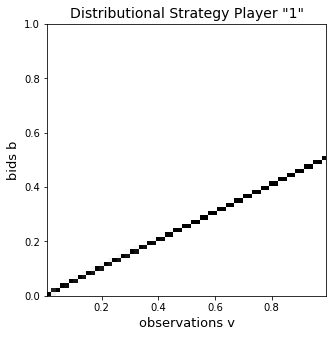

In [11]:
strategies['1'].plot()